<a href="https://colab.research.google.com/github/aayeshaqureshi/nlp/blob/main/LSTM_RNN_Models_For_Univariate_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#univariate time series forecasting
# considering prev 3 day price predict the next price



# the first step is data preprocessing
### days-   1    2    3    4    5    6    7    8    9    10
### prices- [110,125, 133, 146, 158, 172, 187, 196, 210]
### predict the price for the 10th day considering prev 3 days
we are taking 3 time stamps and predicting the prices for the 4th day in each iteration
3 values are x independent features and the 4th day value y is the dependent feature


###We are going to apply a simple LSTM RNN model
###prediction for the future 10 days 
###plotting- visualization

---




In [12]:
# starting by importing all the required libraries
import numpy as np
from numpy import array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten




In [20]:
#prepare_data function
def prepare_data(timeseries_data, n_features):
  #intialize x and y which is in the form of list
  X,y =[],[]
  for i in range(len(timeseries_data)):
    #find the end of this pattern
    end_ix= i+ n_features
    # check if we are beyond sequence 
    if end_ix> len(timeseries_data)-1:
      break
    #otherwise store it in the sequnce x values
    #and the next value stores in the y axis
    seq_x, seq_y=timeseries_data[i:end_ix],timeseries_data[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)
  


In [21]:
#define input sequence 
timeseries_data= [110,125, 133, 146, 158, 172, 187, 196, 210]
#choose number of timestamps
n_steps=3
#split into samples
#we make a function call to preapre our independent and dependent features
X,y = prepare_data(timeseries_data, n_steps)

In [22]:
print(X), print(y)


[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [23]:
X.shape
# we have 3 features and 6 records

(6, 3)

# Buidling an LSTM model

whenever we implement LSTM we have to reshape our data into 3 dimensions. 
1. number of records
2. number of timestamps here 3
3. n_features


In [24]:
#reshape from [sample, timestamps] to [sample, timestamps, features]
n_features=1
X= X.reshape((X.shape[0],X.shape[1], n_features))

In [25]:
#define model
#intially we create  a sequential layer
model= Sequential()
#then add the lstm layers
#in input shape we give n_steps and n_features
#n_steps is the number of timestamps

#we take 50 hidden neurons in every layer
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape= (n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
#output node
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
#fit the model
model.fit(X,y, epochs=300, verbose=0)
#verbose will display you how the epochs are taking place





#predict for the next 10 days of data


In [26]:
#append the outout into the input list and use the last  values to calculte the next days prediction
x_input = array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

#each time the output is appended 
#finally the ouput for the next 10 days is printed 



[223.83601]
1 day input [196.         210.         223.83601379]
1 day output [[234.89862]]
2 day input [210.         223.83601379 234.89862061]
2 day output [[248.47139]]
3 day input [223.83601 234.89862 248.47139]
3 day output [[261.7161]]
4 day input [234.89862 248.47139 261.7161 ]
4 day output [[274.0763]]
5 day input [248.47139 261.7161  274.0763 ]
5 day output [[287.83917]]
6 day input [261.7161  274.0763  287.83917]
6 day output [[301.4766]]
7 day input [274.0763  287.83917 301.4766 ]
7 day output [[314.99658]]
8 day input [287.83917 301.4766  314.99658]
8 day output [[329.42572]]
9 day input [301.4766  314.99658 329.42572]
9 day output [[343.94504]]
[223.83601, 234.89862, 248.47139, 261.7161, 274.0763, 287.83917, 301.4766, 314.99658, 329.42572, 343.94504]


#Visualizing the output


In [28]:
import matplotlib.pyplot as plt
day_new= np.arange(1,10)
day_pred= np.arange(10,20)


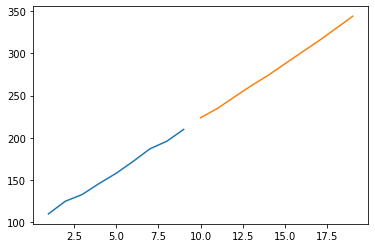

In [29]:
plt.plot(day_new, timeseries_data)
plt.plot(day_pred, lst_output)

